<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/scope_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inizializzation.

This Cell download and intstall ROOT in python 2 environment. 

Runs this part of the script only when you have to init a new machine e and working space

In [1]:
# sitallazione di ROOT dal CERN
!mkdir -p APPS
!pwd
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

# main paths for ROOT  
import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')
# itsllation and root-numpy main PATH
!pip install root-numpy
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')
# patch to open online FILE
! sudo apt-get install libdavix0v5
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRDAVIX.so')
! echo "Davix.GSI.CACheck: n" >> $ROOTSYS/etc/system.rootrc
! cp $ROOTSYS/etc/system.rootrc $HOME/.rootrc
! tail -1 $HOME/.rootrc

/content
--2020-05-01 09:35:26--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.5MB/s    in 5.7s    

2020-05-01 09:35:32 (23.0 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]

     |████████████████████████████████| 522kB 2.8MB/s 
  Created wheel for root-numpy: filename=root_numpy-4.8.0-cp27-cp27mu-linux_x86_64.whl size=1075562 sha256=737de65008cd5c575c405c4d8861790f88c643466dadaad50cf16c2788c5fc4f
  Stored in directory: /root/.cache/pip/wheels/f0/3c/18/62ccf3aec0284175916617d699f179d7cdbe4de0c7070be2a5
Successfully built root-numpy
Reading pack

This Cell Load funcions (libraries) to retrive data from swift CYGNO server

Runs this part of the script only when you have to init a new machine e and working space

In [3]:
!pip install -q  python-swiftclient
!pip install -q  keystoneauth1
!pip install -q  h5py
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
import root_numpy as rtnp
! rm cygnus_lib.*; rm mylib.*
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
sys.path.append('.')
import cygnus_lib as cy
import mylib as my
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
from itertools import combinations
import math
import os

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

x_resolution = y_resolution = 2048
plt.rc('font', size = 14, family ='Sans-Serif')
!mkdir -p data

--2020-05-01 09:40:52--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24130 (24K) [text/plain]
Saving to: ‘cygnus_lib.py’

cygnus_lib.py       100%[===================>]  23.56K  --.-KB/s    in 0.01s   

2020-05-01 09:40:53 (1.85 MB/s) - ‘cygnus_lib.py’ saved [24130/24130]

--2020-05-01 09:40:54--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17634 (17K) [text/plain]
Saving to: ‘mylib.py’

mylib.

In [0]:
def TGraph2array(tgraph, negative=True):
  xl = []; yl = []
  ysign = -1 if negative else 1
  for i in range(tgraph.GetN()):
      xi = ctypes.c_double(); yi = ctypes.c_double()
      tgraph.GetPoint(i,xi,yi)
      xl.append(xi.value)
      yl.append(ysign*yi.value)
  x = np.array(xl)
  y = np.array(yl)
  return x, y

running 0


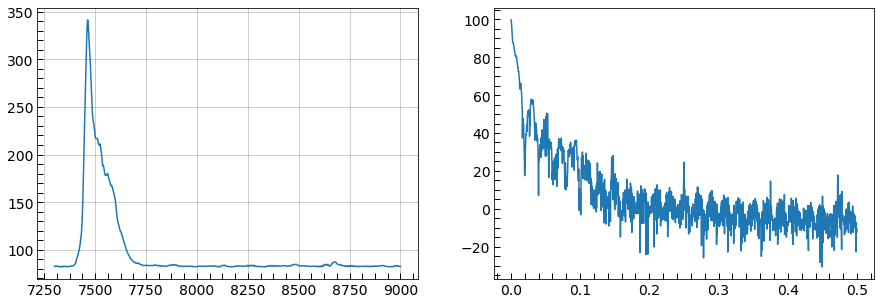

running 10


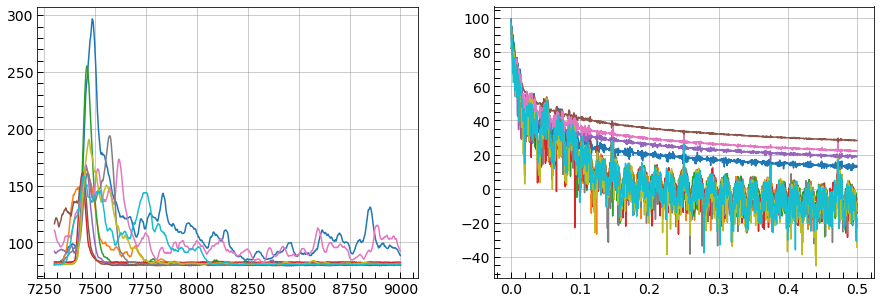

running 20


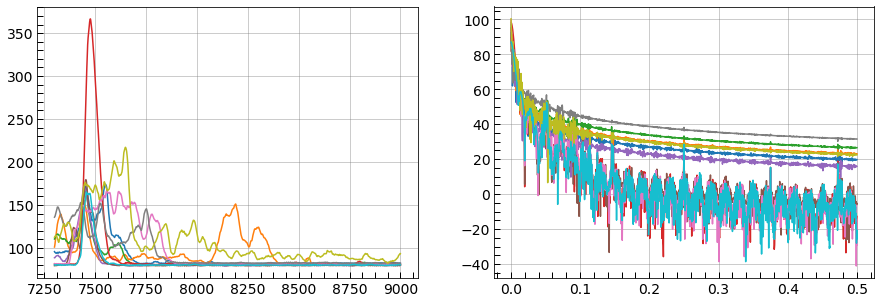

running 30


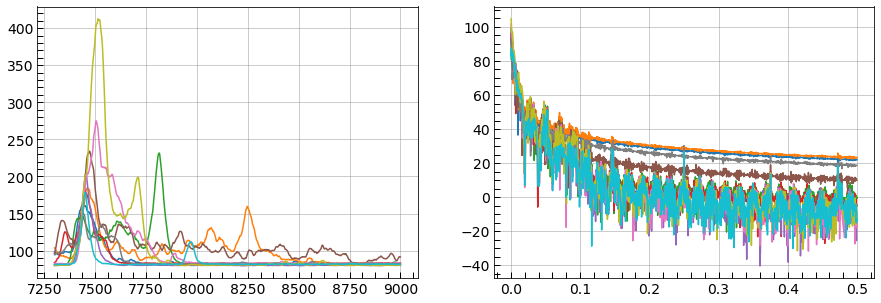

running 40


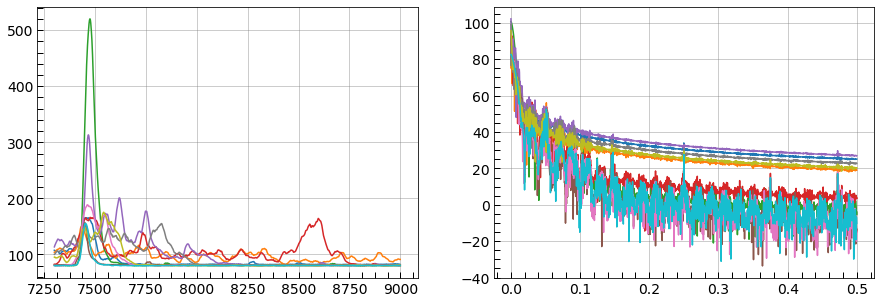

running 50


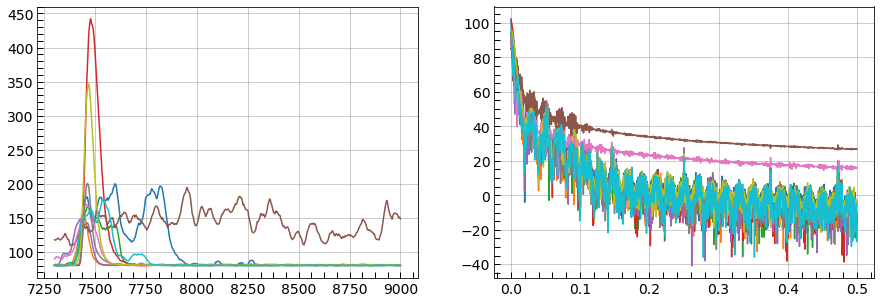

running 60


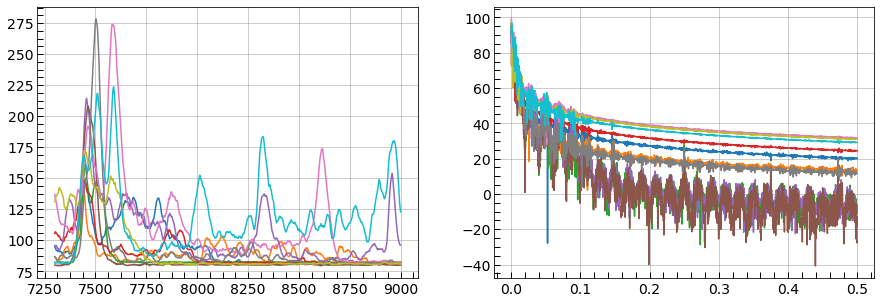

running 70


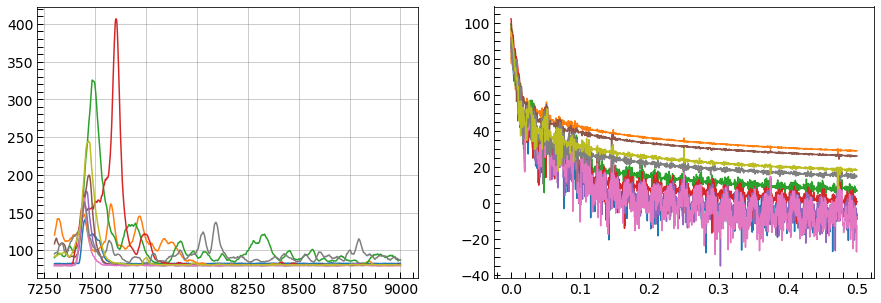

running 80


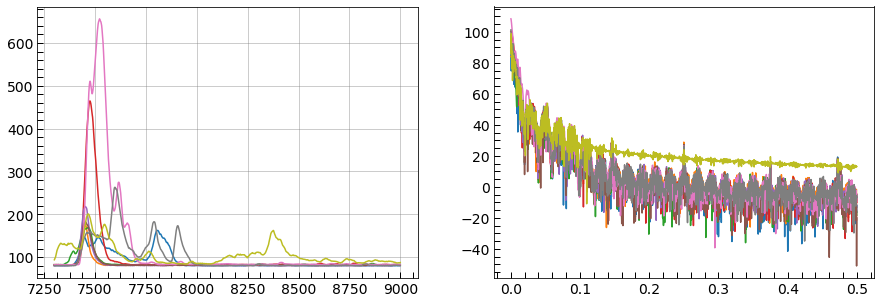

running 90


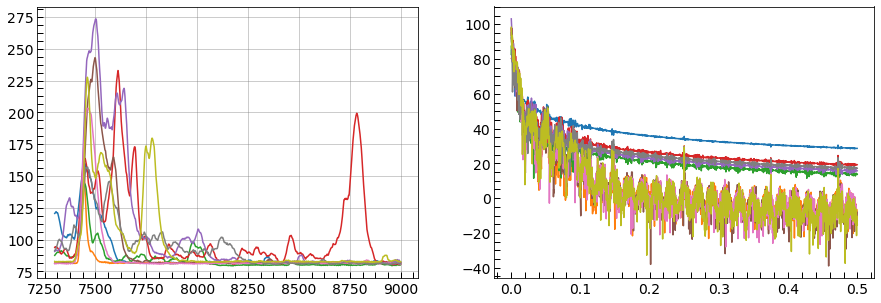

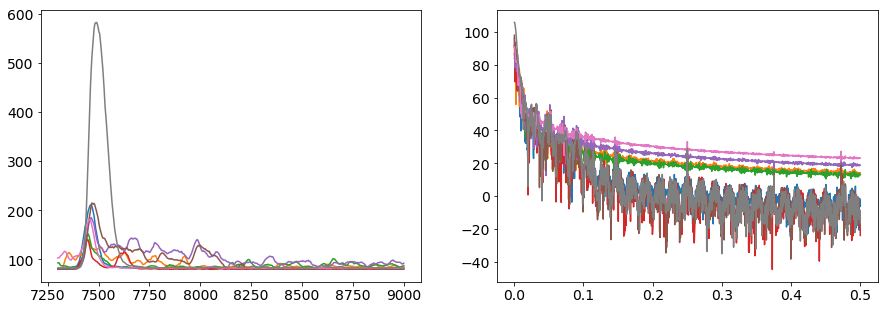

In [183]:
plt.rc('font', size = 14, family ='Sans-Serif')
# mostra l'immagine iTr del file ...
iTr = 0
#
f  = ROOT.TFile.Open('https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run02098.root');
pic, wfm = cy.root_TH2_name(f)
#
fig, ax = plt.subplots(1,2, figsize=(15,5))
Ch = []
wayform = []
for iTr in range(100):

  #fig, ax = plt.subplots(1,3, figsize=(15,5))
  #image = rtnp.hist2array(f.Get(pic[iTr])).T
  t,A = TGraph2array(f.Get(wfm[iTr]))
  offset_int = 100
  if (A+offset_int).mean()>0:
    cut = (t>7300) & (t<9000)
    ts = cy.smooth(t, 100)[cut]
    As = cy.smooth(A, 100)[cut]+offset_int

    ax[0].plot(ts,As)
    
    signalFFT = np.fft.rfft(As)
    signalPSD = np.abs(signalFFT) ** 2
    fftFreq = np.fft.fftfreq(len(signalPSD))
    i = fftFreq>0
    A = 10*np.log10(signalPSD[i])
    ax[1].plot(fftFreq[i], A)
    Ch.append([np.trapz(As, ts), As.max(), ts[np.argmax(As)]])
    wayform.append([iTr, As]) 
    ax[1].grid()
    #ax[2].imshow(image,  cmap="jet", vmin=95,vmax=120)
    if iTr%10==0:
      print('running '+str(iTr))
      ax[0].minorticks_on()
      ax[0].grid()
      ax[1].minorticks_on()
      ax[1].grid()
      ax[0].tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
      ax[1].tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
      #ax[0].set_ylim(-600, 50)
      plt.show()
      fig, ax = plt.subplots(1,2, figsize=(15,5))

AttributeError: ignored

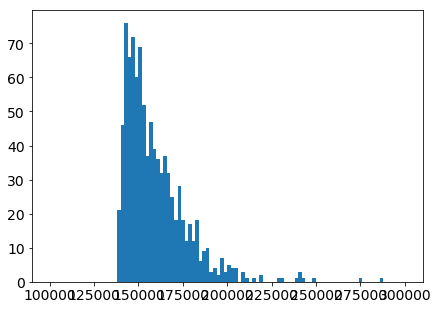

In [169]:
fig, ax = plt.subplots(figsize=(7,5))
Ch = np.array(Ch)
plt.hist(Ch[:,0], bins=100, range=(100000,300000))

plt.show()

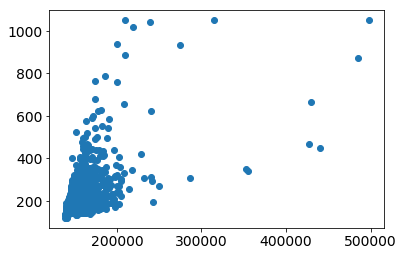

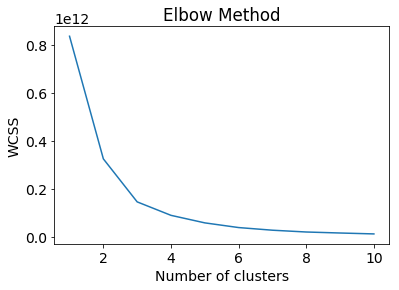

In [129]:
from sklearn.cluster import KMeans
plt.scatter(Ch[:,0], Ch[:,1])
plt.show()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Ch)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

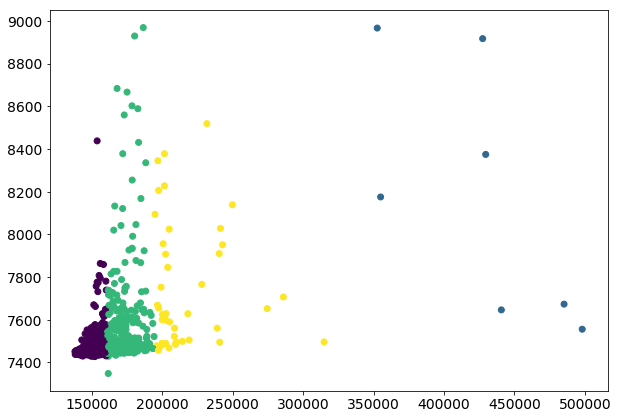

In [149]:
fig, ax = plt.subplots(figsize=(10,7))
from mpl_toolkits.mplot3d import Axes3D
#ax = Axes3D(fig)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Ch)
#plt.scatter(Ch[:,0], Ch[:,1],  Ch[:,2])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
labels = kmeans.labels_
plt.scatter(Ch[:,0], Ch[:,2], c=labels.astype(np.float))

plt.show()

In [186]:
wayform[:,1]

array([array([82.55859375, 82.52929688, 82.5       , ..., 82.08984375,
       82.08984375, 82.12890625]),
       array([82.13867188, 82.16796875, 82.16796875, ..., 88.38867188,
       88.36914062, 88.37890625]),
       array([81.34765625, 81.30859375, 81.24023438, ..., 82.01171875,
       82.00195312, 81.98242188]),
       array([80.08789062, 80.06835938, 80.06835938, ..., 80.53710938,
       80.57617188, 80.56640625]),
       array([82.734375  , 82.79296875, 82.84179688, ..., 82.40234375,
       82.39257812, 82.37304688]),
       array([92.109375  , 92.03125   , 91.94335938, ..., 79.83398438,
       79.85351562, 79.8828125 ]),
       array([116.38671875, 116.640625  , 116.9140625 , ...,  79.90234375,
        79.8828125 ,  79.84375   ]),
       array([110.53710938, 110.48828125, 110.4296875 , ...,  92.74414062,
        92.62695312,  92.50976562]),
       array([80.37109375, 80.36132812, 80.36132812, ..., 80.75195312,
       80.72265625, 80.703125  ]),
       array([80.90820312, 80.9375

In [184]:
wayform = np.array(wayform)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(wayform[:,1])
print(pred_y)
for i in range(len(pred_y)):
  if pred_y[i] == 1:
    iTr = wayform[i,0]
    t,A = TGraph2array(f.Get(wfm[iTr]))
    cut = (t>7300) & (t<8500)
    ts = cy.smooth(t, 100)[cut]
    As = cy.smooth(A, 100)[cut]+offset_int

    plt.plot(ts,As)
plt.show()

ValueError: ignored

-31252.736083984375


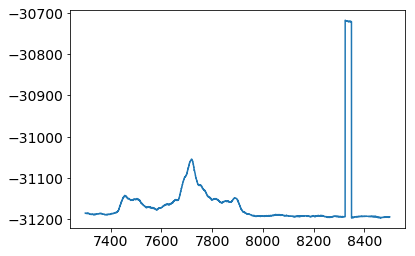

In [106]:
iTr = 95
t,A = TGraph2array(f.Get(wfm[iTr]))
print ((A+100).mean())

cut = (t>7300) & (t<8500)
ts = cy.smooth(t, 100)[cut]
As = cy.smooth(A, 100)[cut]

plt.plot(ts,As+100)
plt.show()